# Agrupamiento con K-means

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris.data[:, 2:4]
y = iris.target

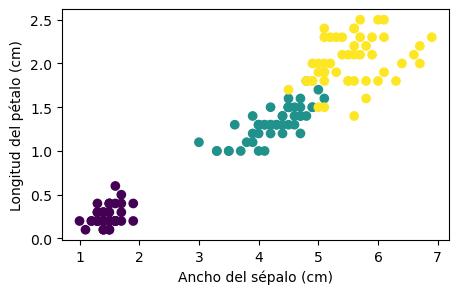

In [5]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Ancho del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
centroides = kmeans.cluster_centers_
centroides

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

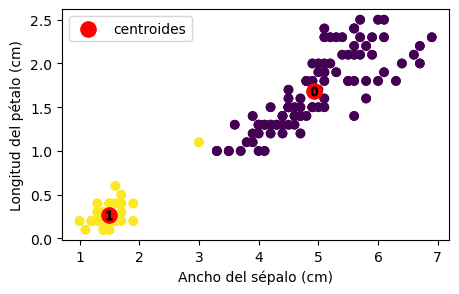

In [20]:
plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='o', s=120, c='r', label='centroides')
for i, c in enumerate(centroides):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=40, edgecolor='k')

plt.legend(scatterpoints=1)
plt.xlabel("Ancho del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")
plt.show()

#### Método del Codo

In [10]:
valores_k = list(range(2, 9))
sum_distancias = []
modelos_kmeans = {}

In [11]:
for k_ind, k in enumerate(valores_k):
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
        kmeans.fit(X)  
        modelos_kmeans[k] = kmeans
        sum_distancias.append(kmeans.inertia_)
        print(f'k={k}, SSE={kmeans.inertia_}')       

k=2, SSE=86.39021984551395
k=3, SSE=31.371358974358984
k=4, SSE=19.483000899685116
k=5, SSE=13.91690875790876
k=6, SSE=11.443249546749549
k=7, SSE=9.57594210526316
k=8, SSE=8.661702759114526


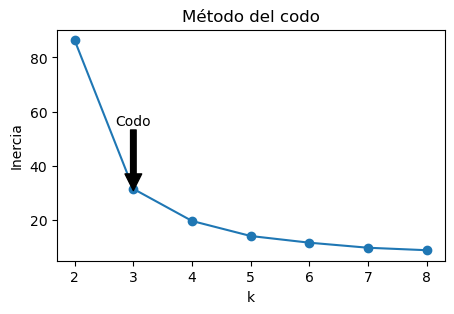

In [12]:
plt.figure(figsize=(5,3))
plt.plot(valores_k, sum_distancias,  marker='o')
plt.xlabel("k")
plt.ylabel("Inercia")
plt.annotate("", xy=(3, sum_distancias[3]), xytext=(3.0, 70),
             arrowprops=dict(facecolor='black', shrink=0.3))
plt.text(3.0, 55, "Codo", horizontalalignment="center")
plt.title("Método del codo")
plt.show()

In [13]:
import numpy as np
X_prueba = np.array([[1.5, 0.5]])
# obtener a que cluster pertenece la instancia
kmeans.predict(X_prueba)

array([1])

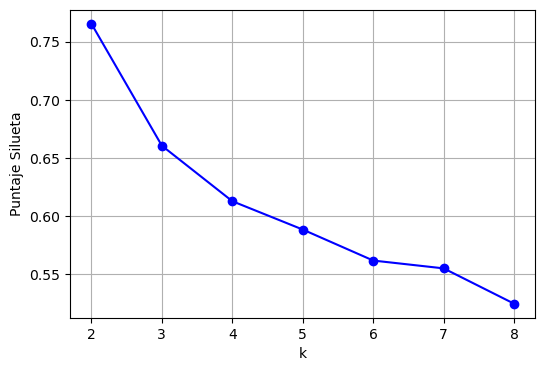

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
puntajes_silueta= [silhouette_score(X, modelo.labels_) for k, modelo in modelos_kmeans.items()]

plt.figure(figsize=(6, 4))
plt.plot(range(2, 9), puntajes_silueta, "bo-")
plt.xlabel("k")
plt.ylabel("Puntaje Silueta")
plt.grid()
plt.show()

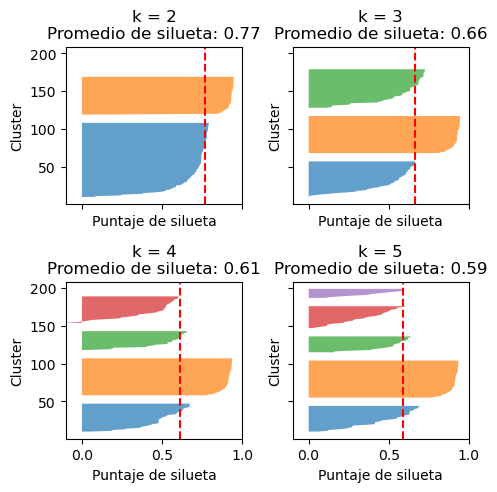

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

k_values = list(modelos_kmeans.keys())
k_values = k_values[0:4]

fig, axs = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)
axs = axs.flatten()

for i, k in enumerate(k_values):
    # Entrenar K-Means
    kmeans = modelos_kmeans[k]
    etiquetas = kmeans.fit_predict(X)
    
    # Calcular la puntuación de silueta
    prom_silueta = silhouette_score(X, etiquetas)
    vals_silueta = silhouette_samples(X, etiquetas)
        
    axs[i].set_title(f'k = {k}\nPromedio de silueta: {prom_silueta:.2f}')
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_xlabel('Puntaje de silueta')
    axs[i].set_ylabel('Cluster')
    
    y_lower = 10
    for cluster in range(k):
        valores_clusters = vals_silueta[etiquetas == cluster]
        valores_clusters.sort()
        
        tam_cluster = valores_clusters.shape[0]
        y_upper = y_lower + tam_cluster
        
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                             0, valores_clusters,
                             alpha=0.7)
        
        y_lower = y_upper + 10  # Espaciado entre clusters

    axs[i].axvline(x=prom_silueta, color="red", linestyle="--")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [23]:
import numpy as np
kmeans = modelos_kmeans[2]
X_prueba = np.array([[1.5, 0.5]])
# obtener a que cluster pertenece la instancia
print("La muestra pertenece al cluster:", kmeans.predict(X_prueba)[0])

La muestra pertenece al cluster: 1


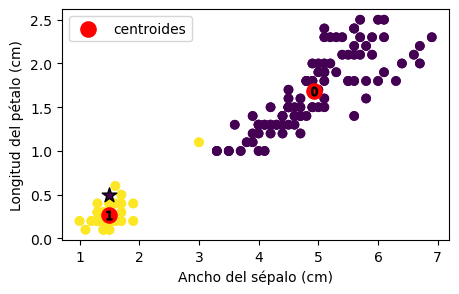

In [24]:
centroides = kmeans.cluster_centers_
clusters = kmeans.labels_
plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='o', s=120, c='r', label='centroides')
for i, c in enumerate(centroides):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=40, edgecolor='k')

plt.scatter(1.5, 0.5, c=kmeans.predict(X_prueba), marker='*', s=120, edgecolor='black')
plt.legend(scatterpoints=1)
plt.xlabel("Ancho del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")
plt.show()